In [59]:
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn import cross_validation, metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Задание 2
## Построение решающего дерева
Загружаем датасет, отделяя столбец ответов.

In [35]:
data = pd.read_csv("german.data-numeric.txt", header=-1, sep='\\s+')
data.head()

In [40]:
X, y = data.iloc[:, :-1], data[24]

In [83]:
def train_model(max_depth=None) :
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    return model

def get_graph(model) :
    dot_data = tree.export_graphviz(model, out_file="tree.out",  class_names=["выдан", "не выдан"],
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
    return graph  

Строим дерево без ограничений на глубину

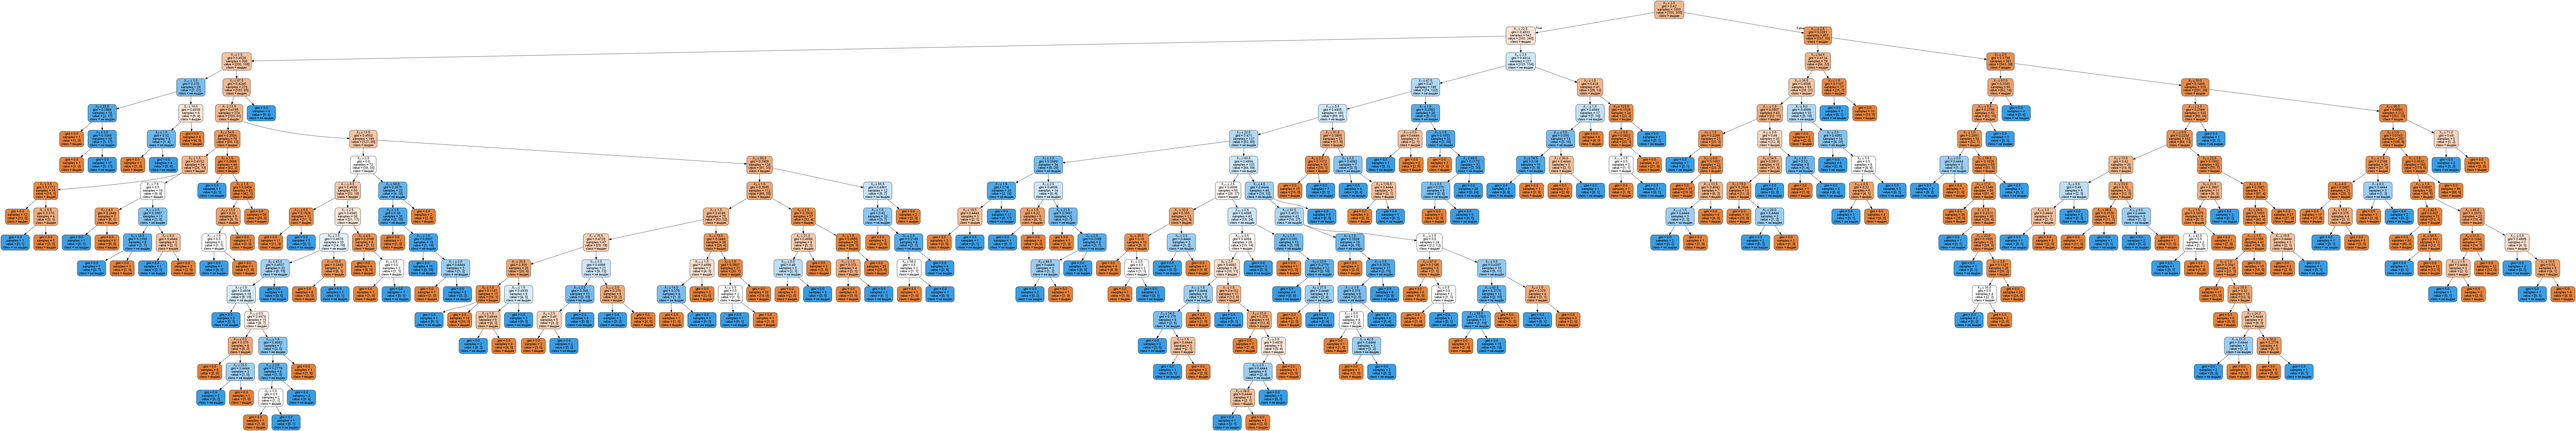

In [34]:
Image(get_graph(train_model()).create_png())

## Анализ
Исследуем точность ответов с помощью cross-validation и на обучающей выборке.

In [68]:
cv_scores = []
train_scores = []
depths = np.arange(1, 21)
for d in depths:
    model = tree.DecisionTreeClassifier(max_depth=d)
    cv_scores.append(cross_validation.cross_val_score(model, X, y).mean())
    
    model.fit(X, y)
    predictions = model.predict(X)
    train_scores.append(metrics.accuracy_score(predictions, y))

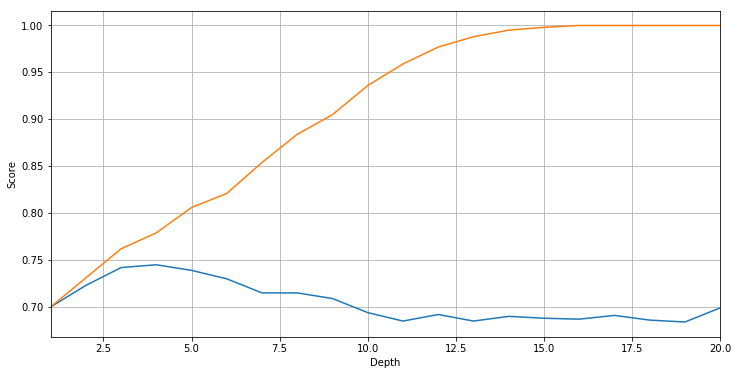

In [78]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.xlim(1, 20)
plt.plot(depths, cv_scores)
plt.plot(depths, train_scores)
plt.show()

In [89]:
best_depth = np.argmax(cv_scores) + 1
print "Максимальная точность cv при глубине", best_depth

Максимальная точность cv при глубине 4


При допустимой глубине более 15 дерево полностью подстраивается под обучающую выборку.

Теперь можно посмотреть на оптимальное дерево:

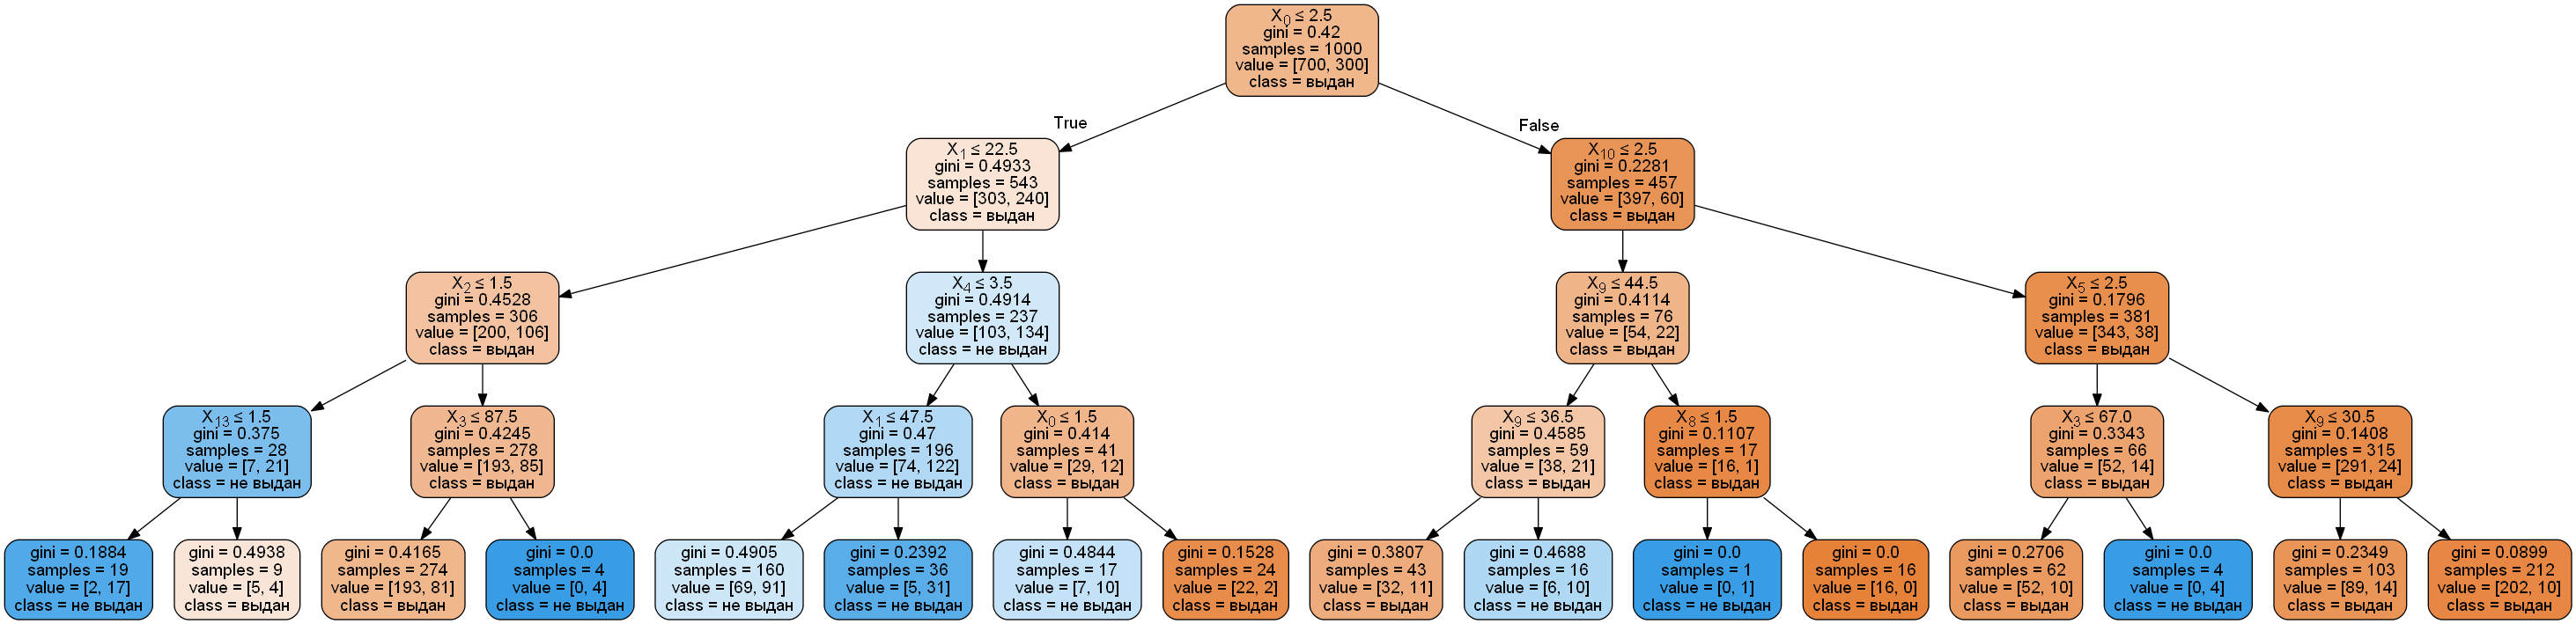

In [90]:
Image(get_graph(train_model(best_depth)).create_png())

Главным признаком оказался остаток на текущем счете ($X_0$). Если денег мало, то кредит выдают на короткий срок ($X_1$). Иначе смотрят на другие платежи на период кредита, и их наличие (значение $X_{10}$ 1 или 2) является сильным поводом для отказа. Другие разбиения не выглядят информативными, кроме того, отсутствует точное описание признаков в numeric варианте датасета (они явно перемешаны и изменены относительно исходного)